# House Price Prediction 

### Context

The price of the house depends on various factors like locality, connectivity, number of rooms, etc. Change in the mindset of the millennial generation also contributes to ups and down in house prices as the young generation is much into renting than to owe a house. Predicting the right price of the house is important for investors in the real estate business. This makes it very important to come up with proper and smart technique to estimate the true price of the house. 
 

### Problem Statement


You are willing to sell your house. You are not sure about the price of your house and want to estimate its price. You are provided with the dataset and need to make a prediction model which will help you to get a good estimate of your house for selling it. 

### Data Description

> Indented block



The **housing** dataset contains the prices and other attributes. There are $545$ rows and $12$ attributes (features) with a target column (price). 

Following are the features:  

|Column|Description|
|---:|:---|
|`Price`|Price in INR|
|`area`|Area in square ft.|
|`bedrooms`|Number of bedrooms in the house|
|`bathrooms`|Number of bathrooms in the house|
|`stories`|Number of stores in the house|
|`mainroad`|Whether house is on main road or not(binary)|
|`guestroom`|Whether house have guestroom or not(binary)|
|`basement`|Whether house have basement or not(binary)|
|`airconditioning`|Whether house have airconditioning or not(binary)|
|`hotwaterheating`|Whether house have hotwaterheating or not(binary)|
|`parking`|Number of parking area|
|`prefarea`|Whether house have prefarea or not(binary)|
|`furnishingstatus`|Furnish status of the house|


  **Dataset Link:**  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv

### Things To Do

1. Explore the Housing dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes using feature encoding.

3. Build a linear regression model by selecting the most relevant features to predict the price of houses.

4. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.


#### 1. Import Modules and Load Dataset

**Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv


In [1]:
# Import the required modules and load the dataset.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
# Check if there are any NULL values.
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables. 

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

- Create a normal distribution curve for the `price`.

In [4]:
# Check categorical attributes
df_categorical = df.select_dtypes(['object'])
df_categorical.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


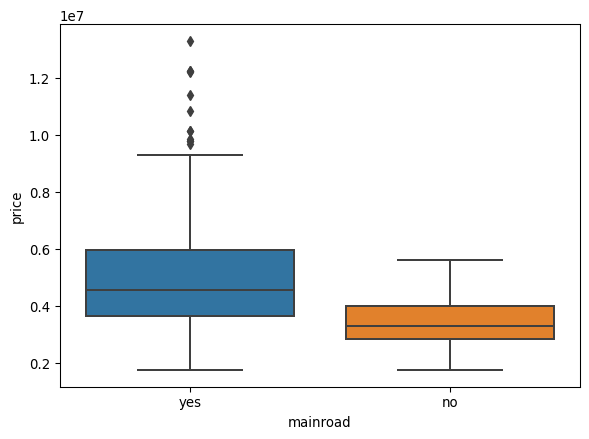

In [5]:
# Boxplot for 'mainroad' vs 'price'
plt.figure(figsize = (7, 5), dpi = 96)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.show()

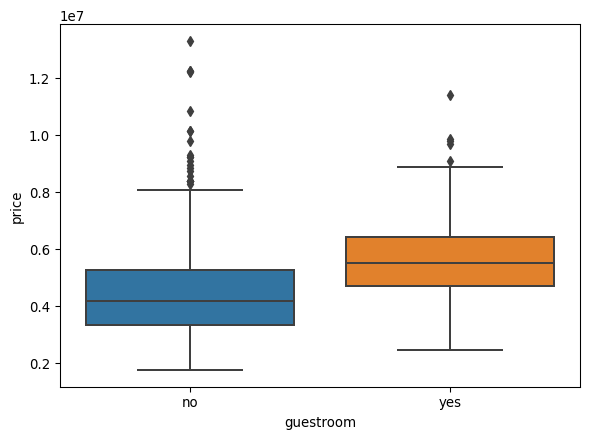

In [6]:
# Boxplot for 'guestroom' vs 'price'

plt.figure(figsize = (7, 5), dpi = 96)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.show()

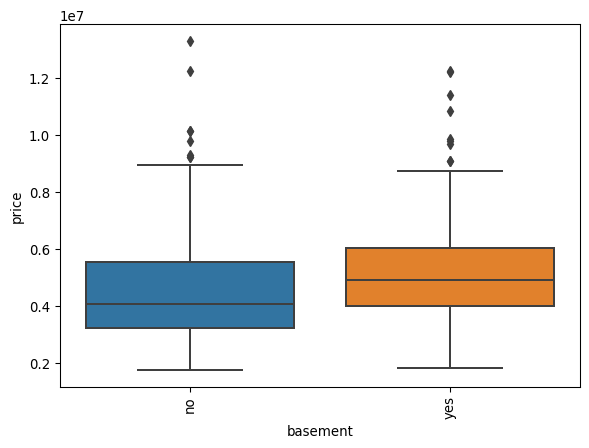

In [7]:
# Boxplot for 'basement' vs 'price'
plt.figure(figsize = (7, 5), dpi = 96)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.xticks(rotation = 90)
plt.show()

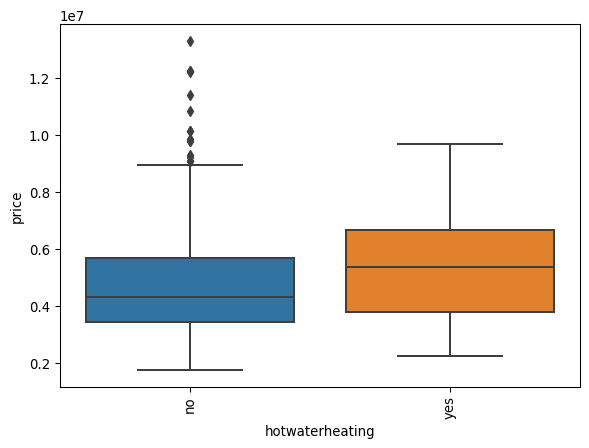

In [8]:
# Boxplot for 'hotwaterheating' vs 'price'
plt.figure(figsize = (7, 5), dpi = 96)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.xticks(rotation = 90)
plt.show()

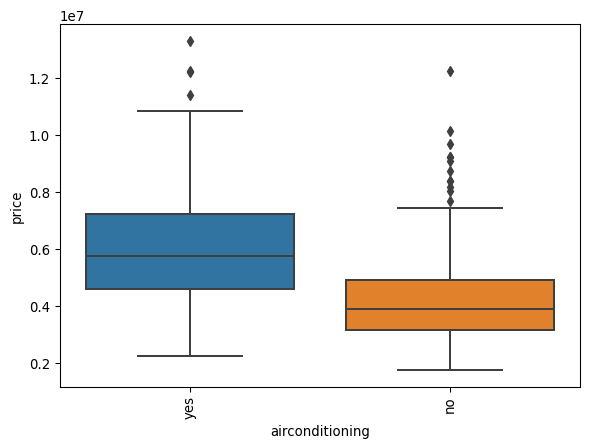

In [9]:
# Boxplot for 'airconditioning' vs 'price'

plt.figure(figsize = (7, 5), dpi = 96)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.xticks(rotation = 90)
plt.show()

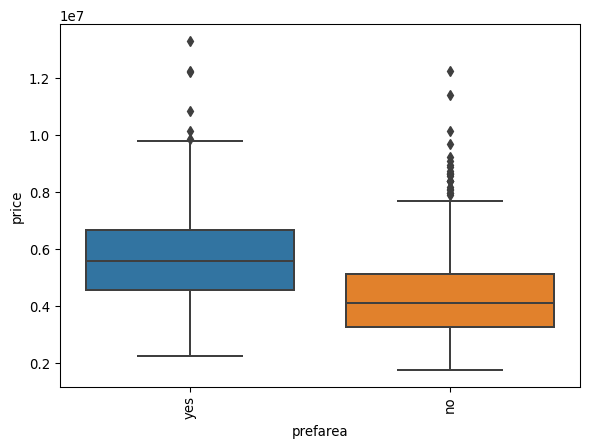

In [10]:
# Boxplot for 'prefarea' vs 'price'

plt.figure(figsize = (7, 5), dpi = 96)
sns.boxplot(x = 'prefarea', y = 'price', data = df)
plt.xticks(rotation = 90)
plt.show()

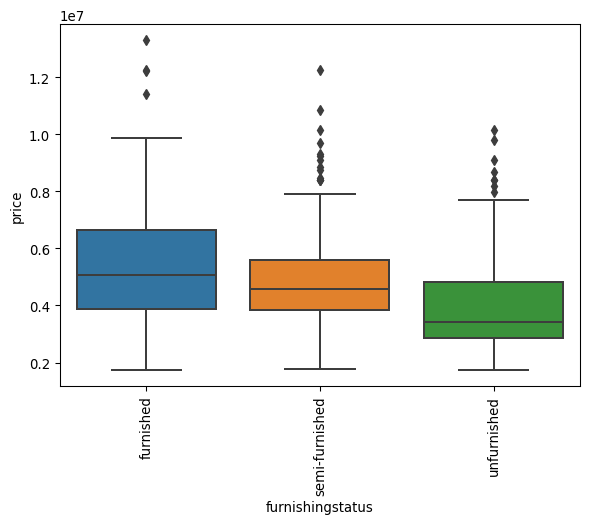

In [11]:
# Boxplot for 'furnishingstatus' vs 'price'

plt.figure(figsize = (7, 5), dpi = 96)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.xticks(rotation = 90)
plt.show()

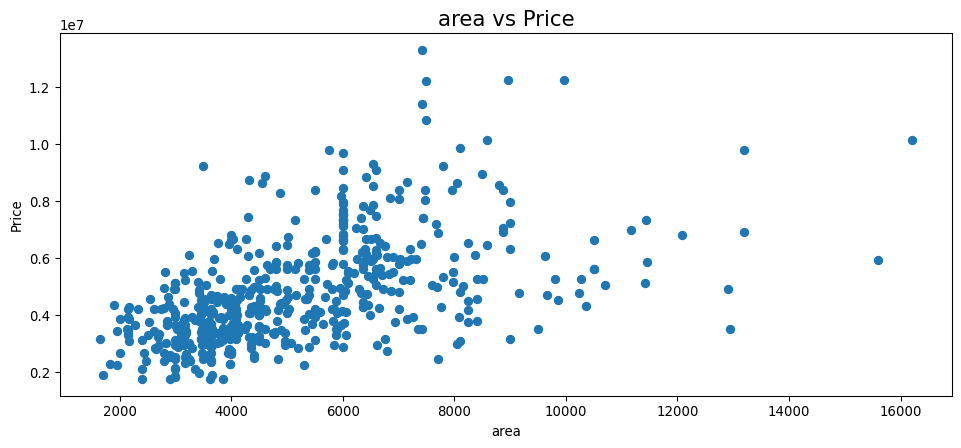

In [12]:
# Create scatter plot with 'area' on X-axis and 'price' on Y-axis

plt.figure(figsize = (12, 5), dpi = 96)
plt.title("area vs Price", fontsize = 16)
plt.scatter(df['area'], df['price'])
plt.xlabel("area")
plt.ylabel("Price")
plt.show()

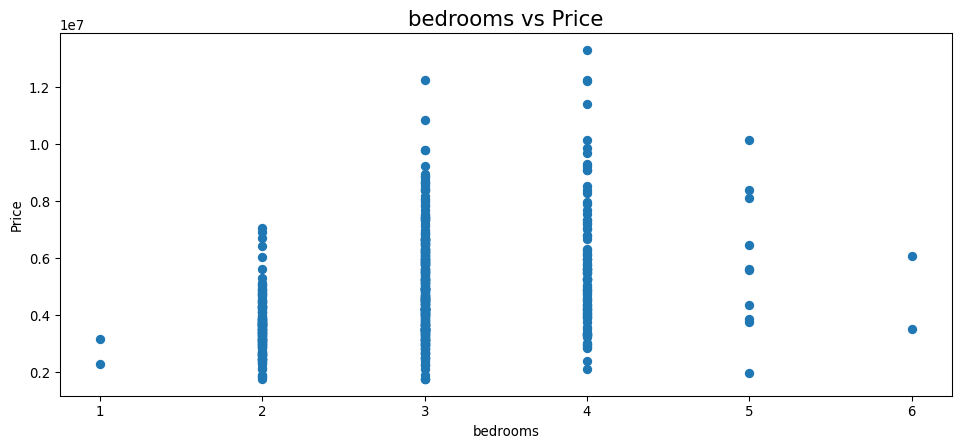

In [13]:
# Create scatter plot with 'bedrooms' on X-axis and 'price' on Y-axis

plt.figure(figsize = (12, 5), dpi = 96)
plt.title("bedrooms vs Price", fontsize = 16)
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.show()

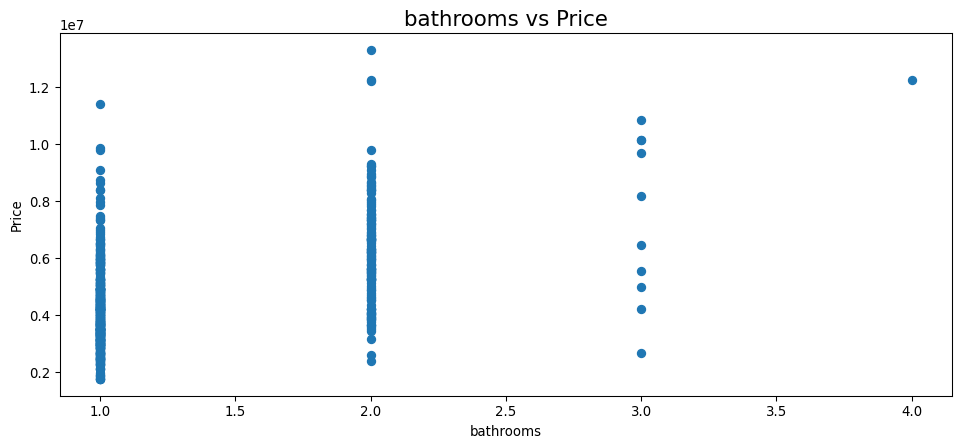

In [14]:
# Create scatter plot with 'bathrooms' on X-axis and 'price' on Y-axis

plt.figure(figsize = (12, 5), dpi = 96)
plt.title("bathrooms vs Price", fontsize = 16)
plt.scatter(df['bathrooms'], df['price'])
plt.xlabel("bathrooms")
plt.ylabel("Price")
plt.show()

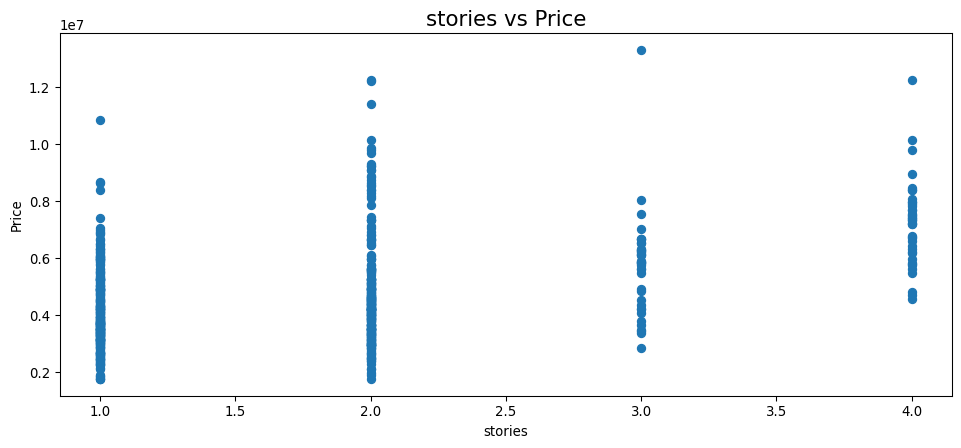

In [15]:
# Create scatter plot with 'stories' on X-axis and 'price' on Y-axis

plt.figure(figsize = (12, 5), dpi = 96)
plt.title("stories vs Price", fontsize = 16)
plt.scatter(df['stories'], df['price'])
plt.xlabel("stories")
plt.ylabel("Price")
plt.show()

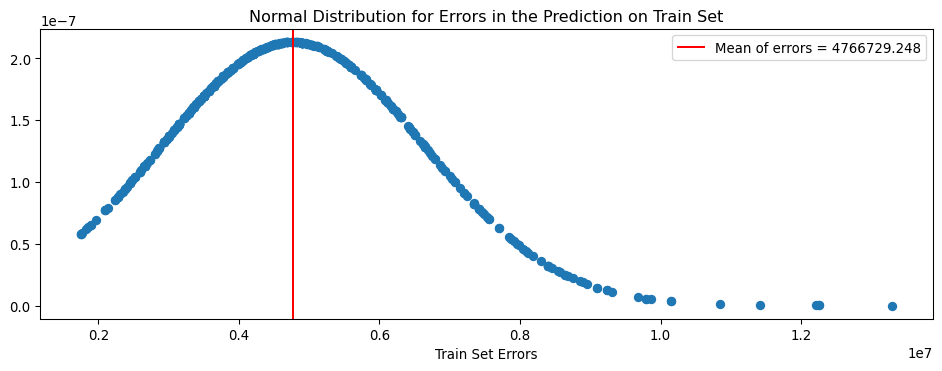

In [16]:
# Create a normal distribution curve for the 'price'.

# Create a probablity density function for plotting the normal distribution
def prob_density_func(series):
  CONST = 1 / (series.std() * np.sqrt(2 * np.pi))
  power_of_e = - (series - series.mean()) ** 2 / (2 * series.var()) # 'pd.Series.var()' function returns the variance of the series.
  new_array = CONST * np.exp(power_of_e)
  return new_array

# Plot the normal distribution curve using plt.scatter() 
plt.figure(figsize = (12, 4), dpi = 96)
plt.scatter(df['price'], prob_density_func(df['price']))
plt.title("Normal Distribution for Errors in the Prediction on Train Set")
plt.axvline(x = df['price'].mean(), label = f"Mean of errors = {df['price'].mean():.3f}", color = 'r')
plt.xlabel("Train Set Errors")
plt.legend()
plt.show()

**__________________________________________________________________________________________________________________________**

#### 3. Feature encoding 

Perform feature encoding using `map()` function and one-hot encoding.

In [17]:
# Replace yes with 1 and no with 0 for all the values in features 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' using map() function.

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [18]:
# Print dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [19]:
# Perform one hot encoding for furnishingstatus feature.
df_dummies_furnishingstatus = pd.get_dummies(df['furnishingstatus'], drop_first = False)
df = pd.concat([df, df_dummies_furnishingstatus], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [20]:
# Drop 'furnishingstatus' feature
df.drop(['furnishingstatus'], axis = 1, inplace=True)

In [21]:
# Print dataframe 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


#### 4. Model Building and Evaluation 

Build a multiple linear regression model using the `statsmodels.api` module.

In [22]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.4, random_state = 42)

In [23]:
# Create separate data-frames for the feature and target variables for both the train and test sets.

features = list(df.columns)
features.remove('price')

X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']

X_train.shape

(327, 14)

In [24]:
# Build a linear regression model using all the features to predict prices.
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()
lin_reg.params

const              176949.758861
area                  250.417281
bedrooms           102581.211492
bathrooms          899354.834345
stories            384354.682068
mainroad           383444.453667
guestroom          346059.536764
basement           419534.833346
hotwaterheating    737594.611729
airconditioning    653976.113075
parking            254916.721961
prefarea           454983.454541
furnished          270904.493983
semi-furnished     116684.364007
unfurnished       -210639.099130
dtype: float64

In [25]:
# Print the summary of the linear regression report.
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     46.60
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           3.00e-65
Time:                        10:17:35   Log-Likelihood:                -4965.2
No. Observations:                 327   AIC:                             9958.
Df Residuals:                     313   BIC:                         1.001e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.769e+05   2.17e+05     

In [26]:
# Calculate N and p values
num_rows = X_train.shape[0] # Number of rows or instances 
num_predictors = X_train.shape[1] # Number of columns or feature (or independent) variables
print("Number of rows (N):", num_rows)
print("Number of predictors (p):", num_predictors)

Number of rows (N): 327
Number of predictors (p): 14


In [27]:
# Calculate the adjusted R-square value.
num_rows = X_train.shape[0] # Number of rows or instances 
num_predictors = X_train.shape[1] # Number of columns or feature (or independent) variables
r2_score = lin_reg.rsquared # R-squared (or coefficient of determination) value 
adj_r2_score = 1 - ((1 - r2_score) * (num_rows - 1))/(num_rows - num_predictors - 1) # Adjusted R-squared calculation
adj_r2_score

0.6440745823412127

#### 5. Model Evaluation

Build a multiple linear regression model  using `sklearn` module. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.

In [28]:
# Build multiple linear regression model using all the features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Build linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train)

# Print the value of the intercept
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_:.6f}") 

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(X_train.columns.values, sklearn_lin_reg.coef_)):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")  


Constant       235933.011814
area            250.417281
bedrooms        102581.211492
bathrooms       899354.834345
stories         384354.682068
mainroad        383444.453667
guestroom       346059.536764
basement        419534.833346
hotwaterheating 737594.611729
airconditioning 653976.113075
parking         254916.721961
prefarea        454983.454541
furnished       211921.241029
semi-furnished  57701.111054
unfurnished     -269622.352083


In [29]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.659
Mean Squared Error: 904270696211.558
Root Mean Squared Error: 950931.489
Mean Absolute Error: 685396.509


Test Set
--------------------------------------------------
R-squared: 0.675
Mean Squared Error: 1506230725917.454
Root Mean Squared Error: 1227285.919
Mean Absolute Error: 902975.642


#### 6. Recursive Feature Elimination

Find out the best features out of all features using RFE and evaluate the model again.

In [30]:
# Create a Python dictionary storing the moderately to highly correlated features with price and the corresponding correlation values.
# Keep correlation threshold to be 0.2
major_features = {}
for f in features:
  corr_coef = np.corrcoef(df['price'], df[f])[0, 1]
  if (corr_coef >= 0.2) or (corr_coef <= -0.2):
    major_features[f] = corr_coef

print("Number of features moderately to highly correlated with price =", len(major_features), "\n")
major_features

Number of features moderately to highly correlated with price = 11 



{'area': 0.5359973457780797,
 'bedrooms': 0.3664940257738688,
 'bathrooms': 0.5175453394550111,
 'stories': 0.4207123661886166,
 'mainroad': 0.2968984892639764,
 'guestroom': 0.25551728993500006,
 'airconditioning': 0.45295408425604816,
 'parking': 0.38439364863572595,
 'prefarea': 0.3297770498681073,
 'furnished': 0.2293503124843313,
 'unfurnished': -0.2805873573251202}

In [31]:
# Perform RFE and select best 7 features  

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 7 features.
skl_lin_reg = LinearRegression()
rfe1 = RFE(skl_lin_reg)

# Fit with 2 features.
rfe1.fit(X_train[major_features.keys()], y_train)

# Print the attributes.
print(major_features.keys(), "\n")
print(rfe1.support_, "\n")     
print(rfe1.ranking_, "\n")


dict_keys(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'airconditioning', 'parking', 'prefarea', 'furnished', 'unfurnished']) 

[False False  True False  True  True  True False  True False False] 

[7 5 1 4 1 1 1 3 1 6 2] 



In [32]:
# Print the 7 features selected by RFE in the previous step.
rfe_features = X_train[major_features.keys()].columns[rfe1.support_]
rfe_features

Index(['bathrooms', 'mainroad', 'guestroom', 'airconditioning', 'prefarea'], dtype='object')

In [33]:
# Build multiple linear regression model using all the features selected after RFE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[rfe_features] 
y = df['price']

# Split the DataFrame into the train and test sets such that test set has 33% of the values.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 


# Build linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train)

# Print the value of the intercept
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_:.6f}") 

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(X.columns.values, sklearn_lin_reg.coef_)):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") 


Constant       1090988.047454
bathrooms       1689611.316052
mainroad        971023.591542
guestroom       675316.655886
airconditioning 1129890.207308
prefarea        789247.315227


In [34]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.529
Mean Squared Error: 1459428601962.554
Root Mean Squared Error: 1208068.128
Mean Absolute Error: 891716.322


Test Set
--------------------------------------------------
R-squared: 0.487
Mean Squared Error: 2200107666540.365
Root Mean Squared Error: 1483275.991
Mean Absolute Error: 1100491.166


#### 7. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not. For this, plot the  histogram of the residuals.

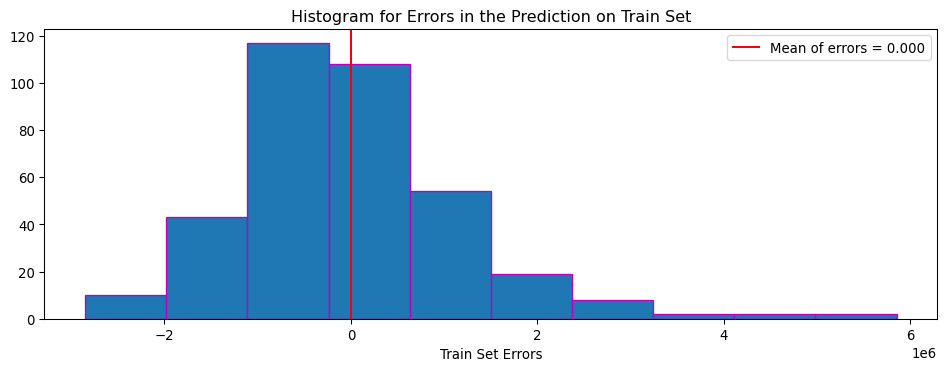

In [35]:
# Create a histogram for the errors obtained in the predicted values for the train set.
errors_train = y_train - y_train_pred

plt.figure(figsize = (12, 4), dpi = 96)
plt.hist(errors_train, bins = 'sturges', edgecolor = 'm')
plt.title("Histogram for Errors in the Prediction on Train Set")
plt.axvline(x = errors_train.mean(), label = f"Mean of errors = {errors_train.mean():.3f}", color = 'r')
plt.xlabel("Train Set Errors")
plt.legend()
plt.show()

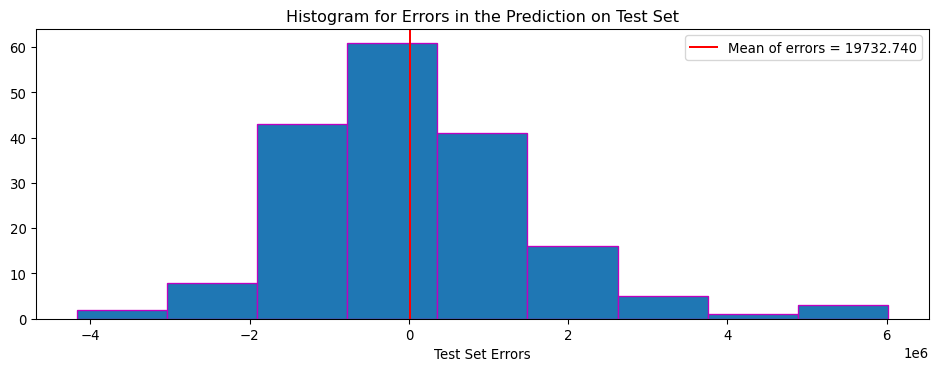

In [36]:
# Create a histogram for the errors obtained in the predicted values for the test set.
errors_test = y_test - y_test_pred

plt.figure(figsize = (12, 4), dpi = 96)
plt.hist(errors_test, bins = 'sturges', edgecolor = 'm')
plt.title("Histogram for Errors in the Prediction on Test Set")
plt.axvline(x = errors_test.mean(), label = f"Mean of errors = {errors_test.mean():.3f}", color = 'r')
plt.xlabel("Test Set Errors")
plt.legend()
plt.show()

#### 8. Verify Homoscedasticity 

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

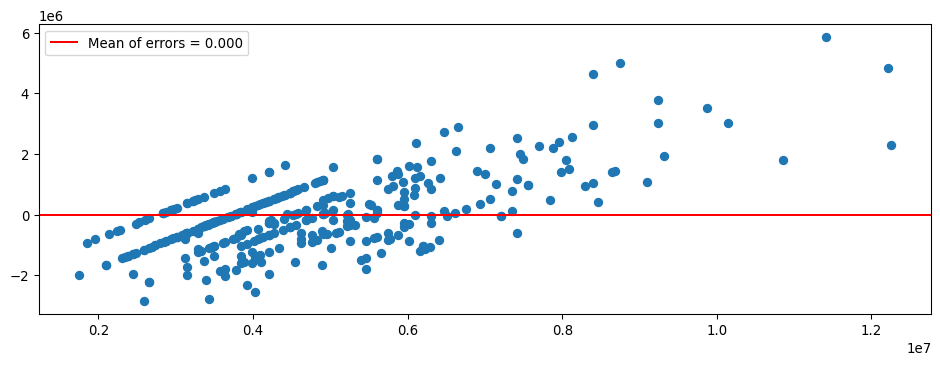

In [37]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize = (12, 4), dpi = 96)
plt.scatter(y_train, errors_train)
plt.axhline(y = errors_train.mean(), color = 'r', label = f'Mean of errors = {errors_train.mean():.3f}')
plt.legend()
plt.show()